# Équipe 7
## Notebook de Maninder

In [38]:
#import the needed  libraries 
import pandas as pd 
from functools import reduce
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [39]:
#create a csv with the film and the years 
film_df = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/film.csv")
film_df = film_df.rename(columns={"FilmoId": "filmoId"},errors='raise')
film_df = film_df[['filmoId','titreOriginal','anneeSortie']]
print(film_df)
film_df.to_csv(r'/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/film_year.csv', index = False, header=True)

        filmoId              titreOriginal  anneeSortie
0             3     HANNAH AND HER SISTERS       1986.0
1             5        GUILTY BY SUSPICION       1991.0
2             6            TACONES LEJANOS       1991.0
3             7         DIARY OF A HIT MAN       1991.0
4             8               STEPPING OUT       1991.0
...         ...                        ...          ...
104389   110073          TABLES AND CHAIRS       1974.0
104390   110074  THREE WORKS FOR MIND/BODY       1975.0
104391   110075  THREE PIECES FOR CIRCUITS       1974.0
104392   110076                        NaN          NaN
104393   110077                        NaN          NaN

[104394 rows x 3 columns]


In [40]:
#donnees de wikidata

film_genres = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/movie_genres.csv")
film_langues = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/movie_langues.csv")
film_places = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/movie_places.csv")
film_directors = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/movie_directors.csv")

In [41]:
#donnees de cinématèque quebecoise 
#*********directors cleanup ***************

#combining the names of the actors with the movies they were in
nom = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Nom.csv")
film_realisation = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Filmo_Realisation.csv")
film_realisation['NomId'] = film_realisation['nomId']
film_director = pd.merge(film_realisation,nom, on='NomId', how="inner")


#combining the first name and last name of the actor
#film_director = film_director[['filmoId','nom','prenom']]
film_director['Nom']= film_director['prenom'] + ' ' + film_director['nom']
film_director = film_director.drop(columns=["nom", "prenom"])

#getting functions of each person
fonction = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Fonction.csv")
filmo_generique = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Filmo_Generique.csv")
filmo_generique['FonctionId'] = filmo_generique['fonctionId']
film_fonctions = pd.merge(fonction,filmo_generique, on='FonctionId', how="inner")
film_fonctions['Role'] = film_fonctions['terme']
film_fonctions = film_fonctions.drop(columns=["filmoId","terme", "organismeId", "fonctionId", "FonctionId","GeneriqueId"])

#PERSONNES ET GENRES
film_fonctions = pd.merge(film_fonctions,film_director,on="nomId", how="inner")
film_fonctions = film_fonctions[['Nom','Role','filmoId']]
film_fonctions.to_csv(r'/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/film_personRole.csv', index = False, header=True)


In [42]:
#donnees de cinématèque quebecoise 
#*********langue cleanup ***************
#combinaison de langueID avec le label de la langue

langue = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Langue.csv")
filmo_langue = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Filmo_Langue.csv")
filmo_langue['LangueId'] = filmo_langue['langueId']
film_langue = pd.merge(filmo_langue,langue, on='LangueId', how="inner")
film_langue['langue'] = film_langue[['terme']]
film_langue = film_langue[['filmoId','langue']]

film_langue.to_csv(r'/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/film_langue.csv', index = False, header=True)

In [43]:
#donnees de cinématèque quebecoise 
#*********pays cleanup ***************
#combinaison de paysID avec le label du pays

pays = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Pays.csv")
filmo_pays = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Filmo_Pays.csv")
filmo_pays['PaysId'] = filmo_pays['paysId']
film_pays = pd.merge(filmo_pays,pays, on='PaysId', how="inner")
film_pays['pays'] = film_pays[['terme']]
film_pays = film_pays[['filmoId','pays']]

film_pays.to_csv(r'/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/film_pays.csv', index = False, header=True)

In [44]:
#donnees de cinématèque quebecoise 
#combinaison de LANGUE ET PAYS 
dfs = [film_langue, film_pays]
langue_pays = reduce(lambda left, right: pd.merge(left, right, on='filmoId', how="inner"), dfs)
langue_pays

#there's more colummns now because some movies are produced in two countries

,filmoId,langue,pays
0,5,anglais,États-Unis
1,25,anglais,Italie
2,25,anglais,Royaume-Uni
3,25,français,Italie
4,25,français,Royaume-Uni
...,...,...,...
52300,103925,Dzongkha,Finlande
52301,103925,Dzongkha,Bhoutan
52302,105511,Dzongkha,Espagne
52303,105511,Dzongkha,Cuba


In [45]:
#donnees de cinématèque quebecoise 
#*********genre cleanup ***************

genres = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/GenresCategories_Wikidata.csv")
filmo_genre = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/Filmo_GenreCategories.csv")
filmo_genre = pd.merge(filmo_genre,genres, on='sujetId', how="inner")
filmo_genre['genre'] = filmo_genre['lienWikidata']
filmo_genre = filmo_genre[['filmoId','genre']]
filmo_genre

,filmoId,genre
0,57864,http://www.wikidata.org/entity/Q93204
1,55784,http://www.wikidata.org/entity/Q93204
2,20937,http://www.wikidata.org/entity/Q93204
3,53108,http://www.wikidata.org/entity/Q93204
4,61024,http://www.wikidata.org/entity/Q93204
...,...,...
121030,62691,http://www.wikidata.org/entity/Q229390
121031,75863,http://www.wikidata.org/entity/Q229390
121032,97606,http://www.wikidata.org/entity/Q229390
121033,109769,http://www.wikidata.org/entity/Q229390


In [46]:
#getting movies genre label   
movies_genre = pd.merge(film_df, filmo_genre, on='filmoId', how="inner")
film_genres = film_genres.drop(columns=['film','titreOriginal'])
#movies = movies.sort_values(by='filmoId')
film_genres = film_genres.drop_duplicates()
#film_genres
genre_labels = pd.merge(filmo_genre, film_genres, on='genre', how="inner")
genre_labels

,filmoId,genre,genreLabel
0,57864,http://www.wikidata.org/entity/Q93204,DOCUMENTAIRES (VIDÉO)
1,57864,http://www.wikidata.org/entity/Q93204,SÉRIES DOCUMENTAIRES (TV)
2,57864,http://www.wikidata.org/entity/Q93204,DOCUMENTAIRE
3,57864,http://www.wikidata.org/entity/Q93204,SÉRIES DOCUMENTAIRES
4,57864,http://www.wikidata.org/entity/Q93204,SÉRIE DOCUMENTAIRE
...,...,...,...
372993,107830,http://www.wikidata.org/entity/Q226730,MUET
372994,107831,http://www.wikidata.org/entity/Q226730,MUET
372995,108164,http://www.wikidata.org/entity/Q226730,MUET
372996,436,http://www.wikidata.org/entity/Q226730,MUET


In [47]:
#genre combiend with data from database

movies_genre = pd.merge(film_df, genre_labels, on='filmoId', how="inner")
movies_genre = movies_genre.sort_values(by='filmoId')
movies_genre.to_csv(r'/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/film_genres.csv', index = False, header=True)
#movies_genre.groupby(movies_genre['filmoId']).count()

In [48]:
film_directors = pd.merge(movies_genre,film_directors,on="titreOriginal")
film_directors.to_csv(r'/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/film_directors_wiki.csv', index = False, header=True)
film_directors

,filmoId,titreOriginal,anneeSortie,genre,genreLabel,film,director,directorLabel
0,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS,http://data.cinematheque.qc.ca/resource/Work5,http://www.wikidata.org/entity/Q950428,Irwin Winkler
1,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS (TV),http://data.cinematheque.qc.ca/resource/Work5,http://www.wikidata.org/entity/Q950428,Irwin Winkler
2,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS (VIDÉO),http://data.cinematheque.qc.ca/resource/Work5,http://www.wikidata.org/entity/Q950428,Irwin Winkler
3,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLER,http://data.cinematheque.qc.ca/resource/Work5,http://www.wikidata.org/entity/Q950428,Irwin Winkler
4,17,URANUS,1990.0,http://www.wikidata.org/entity/Q157443,"HUMOUR, ÉMISSIONS D'",http://data.cinematheque.qc.ca/resource/Work17,http://www.wikidata.org/entity/Q298905,Claude Berri
...,...,...,...,...,...,...,...,...
124110,110070,BROKEN SILENCE,NaN,http://www.wikidata.org/entity/Q93204,DOCUMENTAIRES,http://data.cinematheque.qc.ca/resource/Work11...,http://www.wikidata.org/entity/Q1374327,Vojtech Jasny
124111,110070,BROKEN SILENCE,NaN,http://www.wikidata.org/entity/Q93204,DOCUMENTAIRES,http://data.cinematheque.qc.ca/resource/Work11...,http://www.wikidata.org/entity/Q611429,Luis Puenzo
124112,110070,BROKEN SILENCE,NaN,http://www.wikidata.org/entity/Q93204,DOCUMENTAIRES (TV),http://data.cinematheque.qc.ca/resource/Work11...,http://www.wikidata.org/entity/Q106685,Andrzej Wajda
124113,110070,BROKEN SILENCE,NaN,http://www.wikidata.org/entity/Q93204,DOCUMENTAIRES (TV),http://data.cinematheque.qc.ca/resource/Work11...,http://www.wikidata.org/entity/Q1374327,Vojtech Jasny


In [49]:
genres = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/_film_genres.csv")
pays = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/_film_pays.csv")
langues = pd.read_csv("/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/_film_langue.csv")
film_genres = pd.merge(genres,pays,on="filmoId")
film_genres

,filmoId,titreOriginal,anneeSortie,genre,genreLabel,pays
0,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS,États-Unis
1,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS (TV),États-Unis
2,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS (VIDÉO),États-Unis
3,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLER,États-Unis
4,17,URANUS,1990.0,http://www.wikidata.org/entity/Q157443,"HUMOUR, ÉMISSIONS D'",France
...,...,...,...,...,...,...
422862,110075,THREE PIECES FOR CIRCUITS,1974.0,http://www.wikidata.org/entity/Q790192,"EXPÉRIMENTAUX, FILMS",Canada
422863,110075,THREE PIECES FOR CIRCUITS,1974.0,http://www.wikidata.org/entity/Q459290,"INDÉPENDANTE, VIDÉO",Canada
422864,110075,THREE PIECES FOR CIRCUITS,1974.0,http://www.wikidata.org/entity/Q790192,EXPÉRIMENTAL,Canada
422865,110075,THREE PIECES FOR CIRCUITS,1974.0,http://www.wikidata.org/entity/Q790192,"EXPÉRIMENTAUX, VIDÉOS",Canada


In [50]:
film_genres.to_csv(r'/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/film_genres_pays.csv', index = False, header=True)

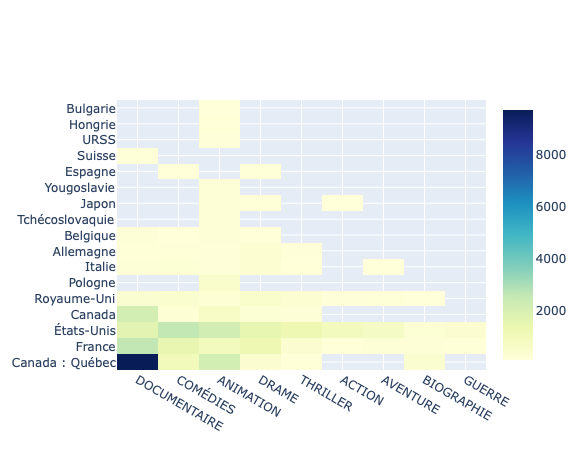

In [51]:
heat = film_genres.groupby(['pays','genreLabel']).agg({'filmoId':['count']})
heat.columns = ['count']
heat = heat.reset_index()
heat.head(50)
genres_list = ['ACTION','DOCUMENTAIRE', 'THRILLER','DRAME','GUERRE','ANIMATION','AVENTURE','BIOGRAPHIE','COMÉDIES','CATASTROPHE']
heat = heat.sort_values(by='count',ascending=False)
heat = heat.query("genreLabel in @genres_list")
heat.head(40)
heat = heat.query("count > 100")
pays_list = ['Canada : Québec','France','États-Unis','Royaume-Uni','Pologne','Italie','Belgique','Tchécoslovaquie','Japon','Yougoslavie']
#heat = heat.query("pays in @pays_list")


fig = go.Figure(data=go.Heatmap(
         z=heat['count'],
         x=heat['genreLabel'],
         y=heat['pays'],
         colorscale='YlGnBu'))
fig.show()

In [55]:
genres_categories = [
    (genres['genreLabel'].str.contains("ACTION|ACTION, ÉMISSIONS D'|ACTION, FILMS D'|ESPIONNAGE, ÉMISSIONS D'|ESPIONNAGE, FILMS D'", case=False,na=False), 'ACTION'),
    (genres['genreLabel'].str.contains('ÉROTIQUES, ÉMISSIONS|ÉROTIQUES, FILMS|ÉROTIQUES, FILMS|ÉROTIQUES, VIDÉOS|ÉROTISME|PORNOGRAPHIE', case=False,na=False), 'SEXUALITE'),
    (genres['genreLabel'].str.contains("ROMANTIQUES, ÉMISSIONS|ROMANTIQUES, FILMS|ROMANTIQUES, VIDÉOS", case=False,na=False), 'ROMANTIQUE'),
    (genres['genreLabel'].str.contains("ANIMATION|ANIMATION (TV)|ANIMATION (VIDÉO)|ANIMATION ET PRISE DE VUES RÉELLES|ANIMATION SANS CAMÉRA|ANIMATION, FILMS D'|ANIMATION, TECHNIQUES MULTIPLES|HOLLYWOOD CARTOONS|OBJETS, ANIMATION D'|DESSINS ANIMÉS|DESSINS ANIMÉS (TV)", case=False,na=False), 'ANIMATION'),
    (genres['genreLabel'].str.contains("AVENTURE|AVENTURE, ÉMISSIONS D'|AVENTURE, FILMS D'|CAPE ET D'ÉPÉE|CAPE ET D'ÉPÉE, FILMS DE|PIRATE|PIRATES, FILMS DE|ROAD MOVIE|ROAD MOVIES|ROAD MOVIES (TV)|GUERRE|GUERRE, ÉMISSIONS DE|GUERRE, FILMS DE|GUERRE, VIDÉOS DE", case=False,na=False), 'AVENTURE'),
    (genres['genreLabel'].str.contains("WESTERN|WESTERNS|WESTERNS (TV)|WESTERNS (VIDÉO)", case=False,na=False), 'WESTERN'),
    (genres['genreLabel'].str.contains("HUMOUR|COMÉDIE|COMÉDIE, ÉMISSIONS DE|COMÉDIES|COMÉDIES (VIDÉO)|HUMOUR, ÉMISSIONS D'", case=False,na=False), 'COMÉDIE'),
    (genres['genreLabel'].str.contains("CRIME|CRIME, DRAMATIQUES DE (TV)|CRIME, FILMS DE|GANGSTERS|GANGSTERS, ÉMISSIONS DE|POLICIER|POLICIÈRES, ÉMISSIONS|POLICIERS, FILMS|POLICIERS, VIDÉOS", case=False,na=False), 'CRIME'),
    (genres['genreLabel'].str.contains("THRILLER|THRILLERS|THRILLERS (TV)|THRILLERS (VIDÉO)", case=False,na=False), 'THRILLER'),
    (genres['genreLabel'].str.contains("ACTUALITÉS|ACTUALITÉS (TV)|ACTUALITÉS, FILMS D'|DOCUMENTAIRE|DOCUMENTAIRE DRAMATISÉ|DOCUMENTAIRES|DOCUMENTAIRES (TV)|DOCUMENTAIRES (VIDÉO)|DOCUMENTAIRES DRAMATISÉS|DOCUMENTAIRES DRAMATISÉS (TV)|SÉRIE DOCUMENTAIRE|SÉRIES DOCUMENTAIRES|SÉRIES DOCUMENTAIRES (TV)|NATURE|NATURE, ÉMISSIONS DE|NATURE, FILMS DE|NATURE, VIDÉOS DE", case=False,na=False), 'DOCUMENTAIRE'),
    (genres['genreLabel'].str.contains("DRAMATIQUE|DRAME|CATASTROPHE|CATASTROPHES, FILMS", case=False,na=False), 'DRAME'),
    (genres['genreLabel'].str.contains("BIOGRAPHIE|BIOGRAPHIQUES, ÉMISSIONS|BIOGRAPHIQUES, FILMS|BIOGRAPHIQUES, VIDÉOS", case=False,na=False), 'BIOGRAPHIE'),
    (genres['genreLabel'].str.contains("HISTORIQUES, FILMS|HISTORIQUES, ÉMISSIONS|HISTORIQUES, VIDÉOS|PÉPLUM", case=False,na=False), 'HISTORIQUE'),
    (genres['genreLabel'].str.contains("MUSICALES, ÉMISSIONS|COMÉDIE MUSICALE|DANSE|DANSE, ÉMISSIONS DE|DANSE, FILMS DE|DANSE, VIDÉOS DE|MUSICAUX, FILMS|MUSICAUX, VIDÉOS|OPÉRA", case=False,na=False), 'MUSICAL'),
    (genres['genreLabel'].str.contains("FANTASTIQUE|FANTASTIQUES, ÉMISSIONS|FANTASTIQUES, FILMS|FANTASTIQUES, VIDÉOS|VAMPIRE|VAMPIRES, FILMS DE|VAMPIRES, VIDÉOS DE|HORREUR|HORREUR, ÉMISSIONS D'|HORREUR, FILMS D'|HORREUR, VIDÉOS D'|SCIENCE-FICTION|SCIENCE-FICTION, ÉMISSIONS DE|SCIENCE-FICTION, FILMS DE|SCIENCE-FICTION, VIDÉOS DE", case=False,na=False), 'FICTION SPÉCULATIVE')
]

genreLabel_criteria, genreLabel_values = zip(*genres_categories)
genres['genres_categorized'] = np.select(genreLabel_criteria, genreLabel_values, 'AUTRES')
genres.to_csv(r'/Users/maninderbhogal/PycharmProjects/INF8808_vsCinematheque/Src/Assets/Data/_film_genres.csv', index = False, header=True)
genres

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



,filmoId,titreOriginal,anneeSortie,genre,genreLabel,genres_categorized
0,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS,THRILLER
1,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS (TV),THRILLER
2,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLERS (VIDÉO),THRILLER
3,5,GUILTY BY SUSPICION,1991.0,http://www.wikidata.org/entity/Q2484376,THRILLER,THRILLER
4,17,URANUS,1990.0,http://www.wikidata.org/entity/Q157443,"HUMOUR, ÉMISSIONS D'",COMÉDIE
...,...,...,...,...,...,...
372993,110075,THREE PIECES FOR CIRCUITS,1974.0,http://www.wikidata.org/entity/Q790192,"EXPÉRIMENTAUX, FILMS",AUTRES
372994,110075,THREE PIECES FOR CIRCUITS,1974.0,http://www.wikidata.org/entity/Q459290,"INDÉPENDANTE, VIDÉO",AUTRES
372995,110075,THREE PIECES FOR CIRCUITS,1974.0,http://www.wikidata.org/entity/Q790192,EXPÉRIMENTAL,AUTRES
372996,110075,THREE PIECES FOR CIRCUITS,1974.0,http://www.wikidata.org/entity/Q790192,"EXPÉRIMENTAUX, VIDÉOS",AUTRES


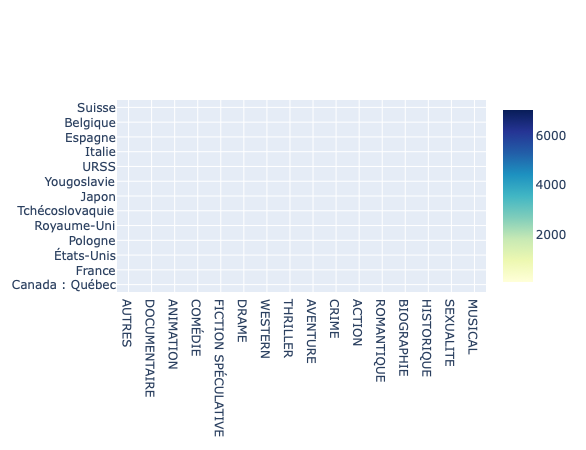

In [56]:
film_genres = film_genres.drop_duplicates(subset=['filmoId'])
heat = film_genres.groupby(['pays','genres_categorized']).agg({'filmoId':['count']})
heat.columns = ['count']
heat = heat.reset_index()
heat.head(50)
#genres_list = ['ACTION','DOCUMENTAIRE', 'THRILLER','DRAME','GUERRE','ANIMATION','AVENTURE','BIOGRAPHIE','COMÉDIES','CATASTROPHE']
heat = heat.sort_values(by='count',ascending=False)
#heat = heat.query("genreLabel in @genres_list")
heat.head(40)
heat = heat.query("count > 50")
heat.head(50)
pays_list = ['Canada : Québec','France','États-Unis','Royaume-Uni','Pologne','Italie','Belgique','Tchécoslovaquie','Japon','Yougoslavie',"Suisse","Espagne","URSS"]
heat = heat.query("pays in @pays_list")


fig = go.Figure(data=go.Heatmap(
         z=heat['count'],
         x=heat['genres_categorized'],
         y=heat['pays'],
         colorscale='YlGnBu'))
fig.show()